# Merge Sort

Keep splitting the array into halves until the subarrays hit a size of one. Then recursively sort the subarrays by merging two subarrays at a time. The final array will be fully sorted.

This is a technique that is known as *divide and conquer*. We divide the problem into smaller subproblems, solve them and then combine the solutions to get the final answer.

> This is two-branch recursion, similar to the fibonacci sequence.

## Implementation

### Implementation of MergeSort

First we split the array half and then half again until base case of 1 length:

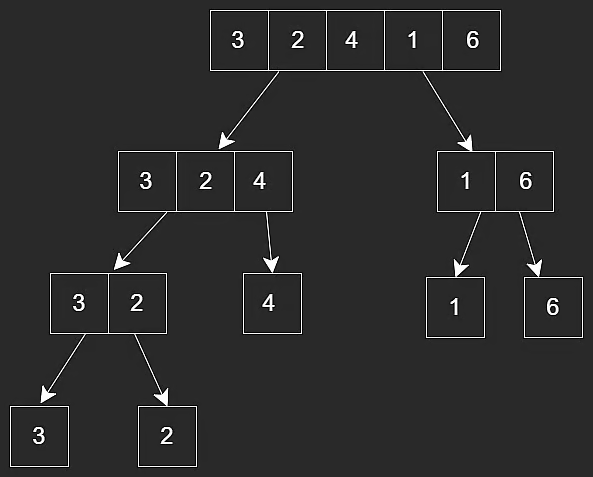

```python
def mergeSort(arr, s, e):
    '''INCLUSIVE of both start and end index, unlike default python indexing
    modifies arr in place
    '''
    #this calculates length of subarray
    if e - s + 1 <= 1:
        return arr

    # The middle index of the subarray
    #this is floor division, so left side always equal or smaller
    m = (s + e) // 2

    # Sort the left half
    mergeSort(arr, s, m)

    # Sort the right half
    mergeSort(arr, m + 1, e)

    # Merge sorted halfs
    merge(arr, s, m, e)
    
    return arr
```

1. We have a base case where if the length of the array is less than or equal to 1, we return the array because it is already sorted.
2. Otherwise we calculate the middle index of the array.
3. We recursively call mergeSort() on the left half of the array. We do this by passing pointers s and m to the function, which in this case represent the start and end of the left half of the array.
4. We recursively call mergeSort() on the right half of the array. We do this by passing pointers m + 1 and e to the function, which in this case represent the start and end of the right half of the array.
5. We merge the two sorted halves by calling the merge() function, which is discussed more below.


## Visualization

### The `mergSort()` recursive call

Similar to two branch recursion, we after splitting and forming the tree, we then piece together 2 sub-branches so that 2 subproblems are combined into one problem.

> It is important to note the sequence in which the calls are executed. The merge() call will not be executed until both the recursive mergeSort() calls have returned for the current subarray.

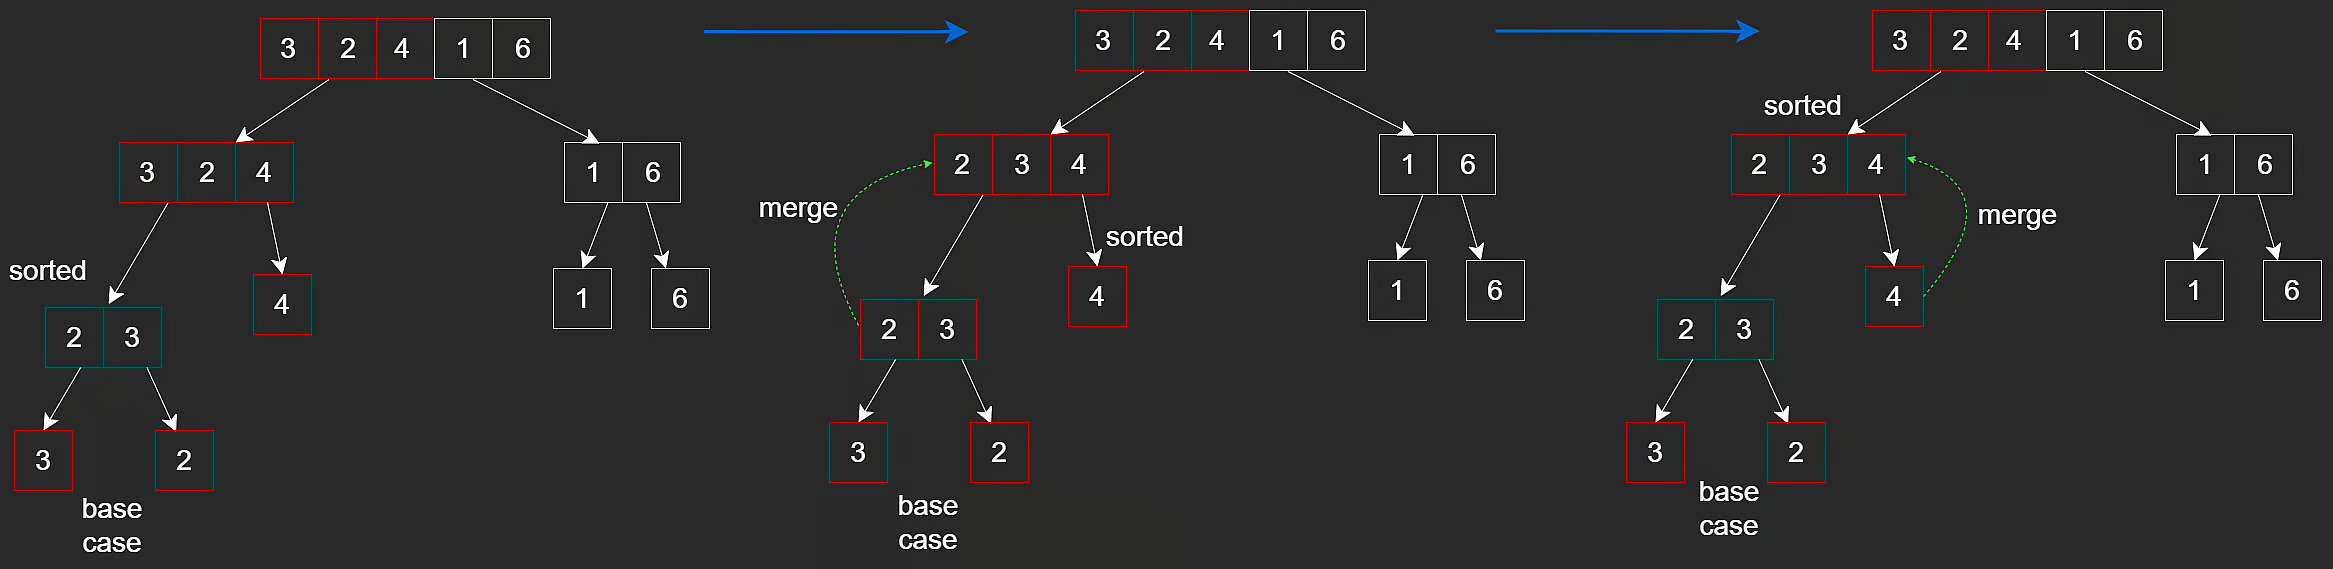
sorting and merging the left half.

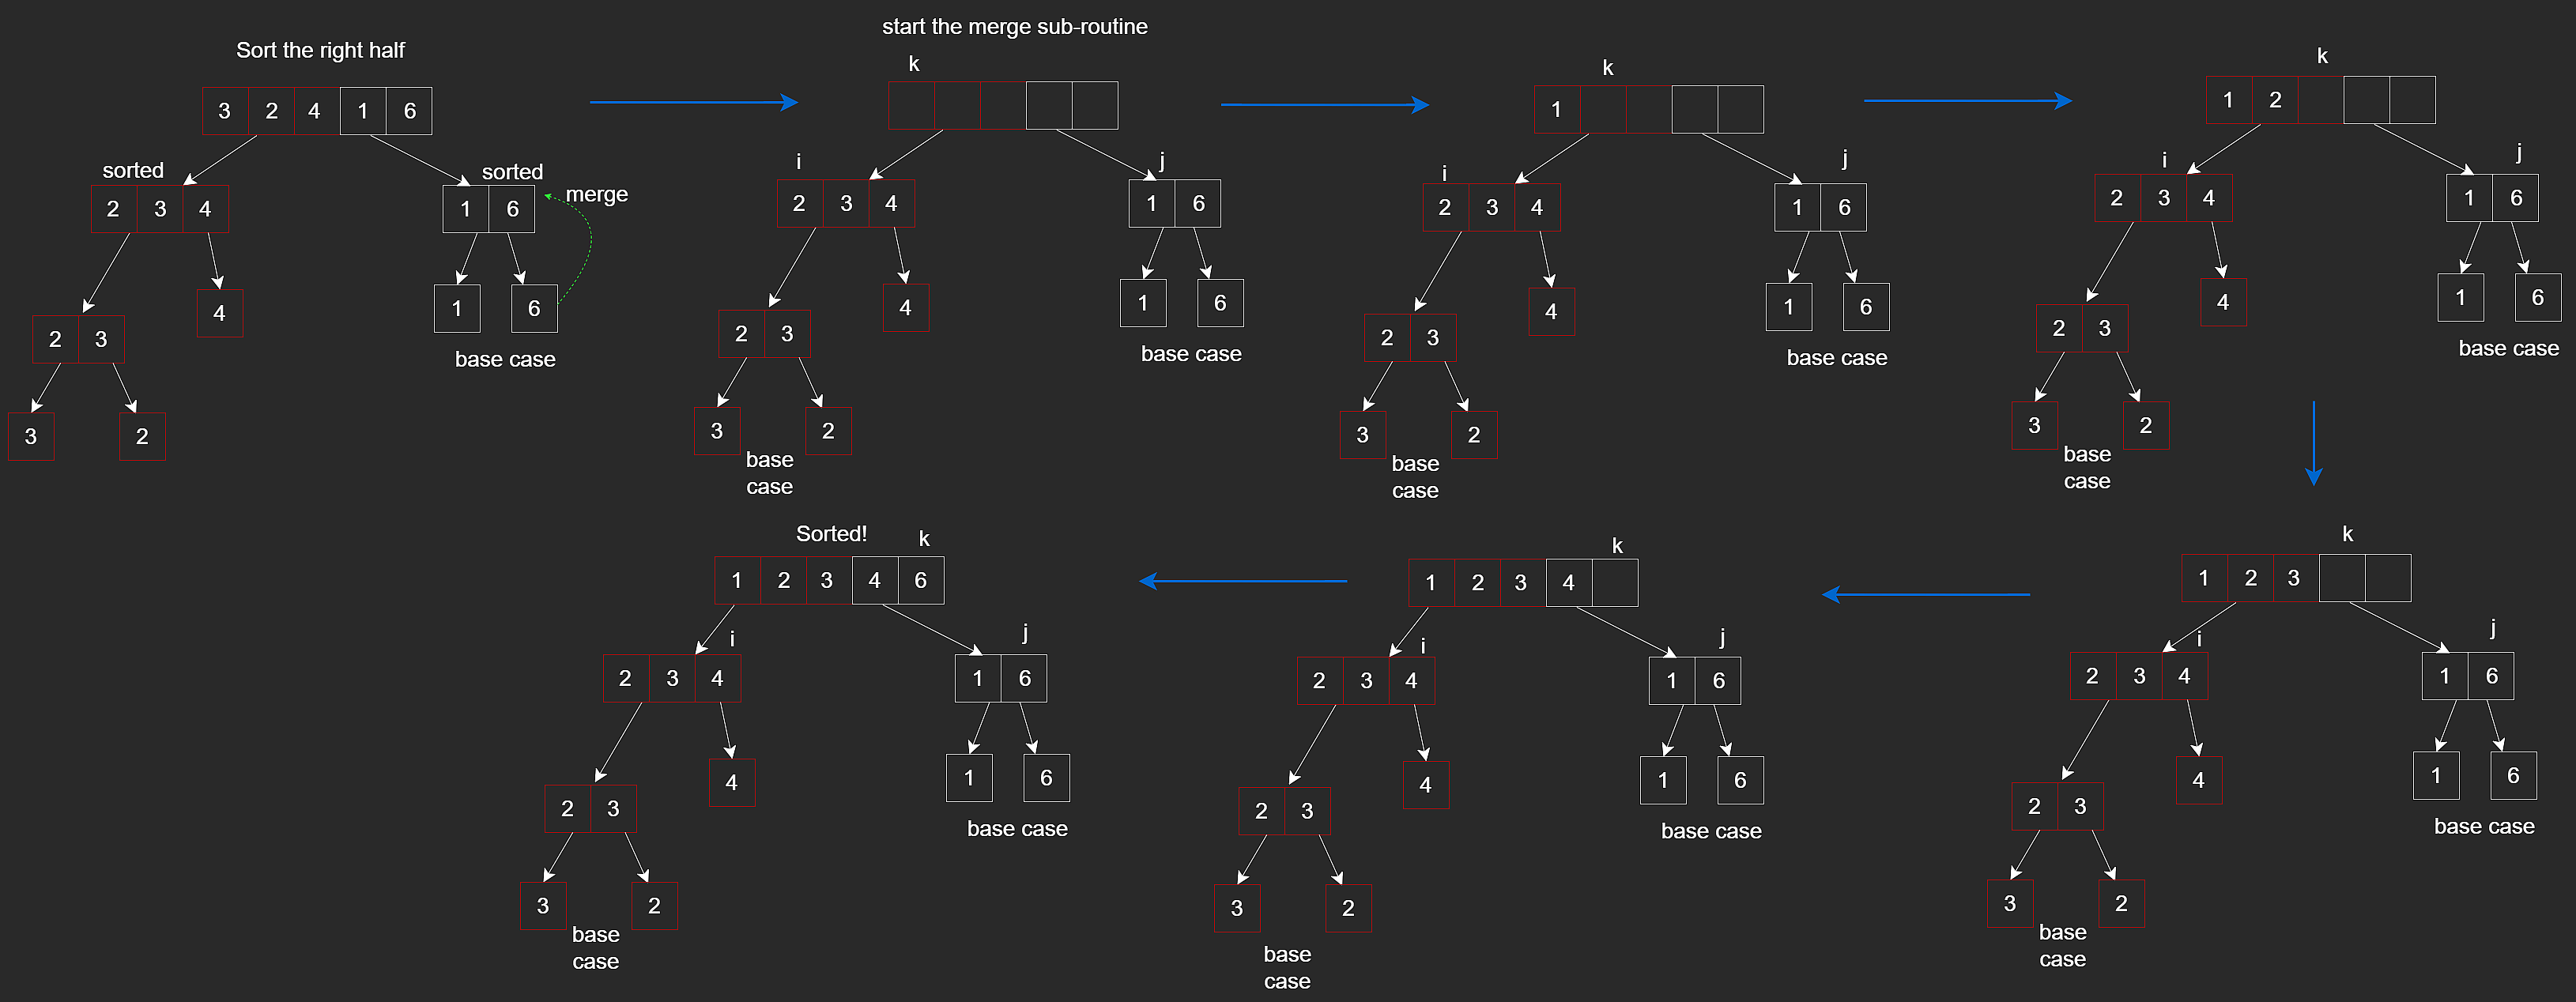
sorting right half, then merging left and right half

## The merge function and 3 pointers

The basic intuition is *combining 2 sorted lists into 1 sorted list*. If we have `List1` and `List2` and the resultant `ListBoth`, the basic intuition is to just take the lower value of the first elems of `List1` and `List2` until no more elems are left in either Lists.

Actually implementing this with 3 pointers `i`,`j`,`k`:

- `k`keeps track of where the next element in combined arr needs to be placed.
- `i` points to the element in the leftSubarray that is currently being compared to the `j` element in the rightSubarray.
- One of `i` or `j` will increment depending on which element in smaller.
- `k` will increment regardless because arr will have an element placed inside of it regardless of which one of `i` or `j` increments.

```python
# Merge in-place
def merge(arr, s, m, e):
    '''here, s,m, and e are simply indexes. s and e are INCLUSIVE! arr is the original huge array'''
    # Copy the sorted left & right halfs to temp arrays
    L = arr[s: m + 1]
    R = arr[m + 1: e + 1]

    i = 0 # index for L
    j = 0 # index for R
    k = s # index for arr

    # Merge the two sorted halfs into the original array

    #while neither points have reached the end of their respective subarrays yet
    while i < len(L) and j < len(R):
        #note the equality sign here! if the left stuff is equal to the right, then assign the elem from left subarray to the combined_subarray first (in other words will be left too)
        # the equality sign differs from QuickSort which is a strict inequality
        if L[i] <= R[j]:
            #steal from L and dump it to k
            arr[k] = L[i]
            i += 1
        else:
            #steal from R
            arr[k] = R[j]
            j += 1
        k += 1

    # One of the halfs will have elements remaining
    while i < len(L):
        #keep taking from L until none left
        arr[k] = L[i]
        i += 1
        k += 1
    while j < len(R):
        #keep taking from R until none left
        arr[k] = R[j]
        j += 1
        k += 1
```

---

## Time and Space Complexity

### Time

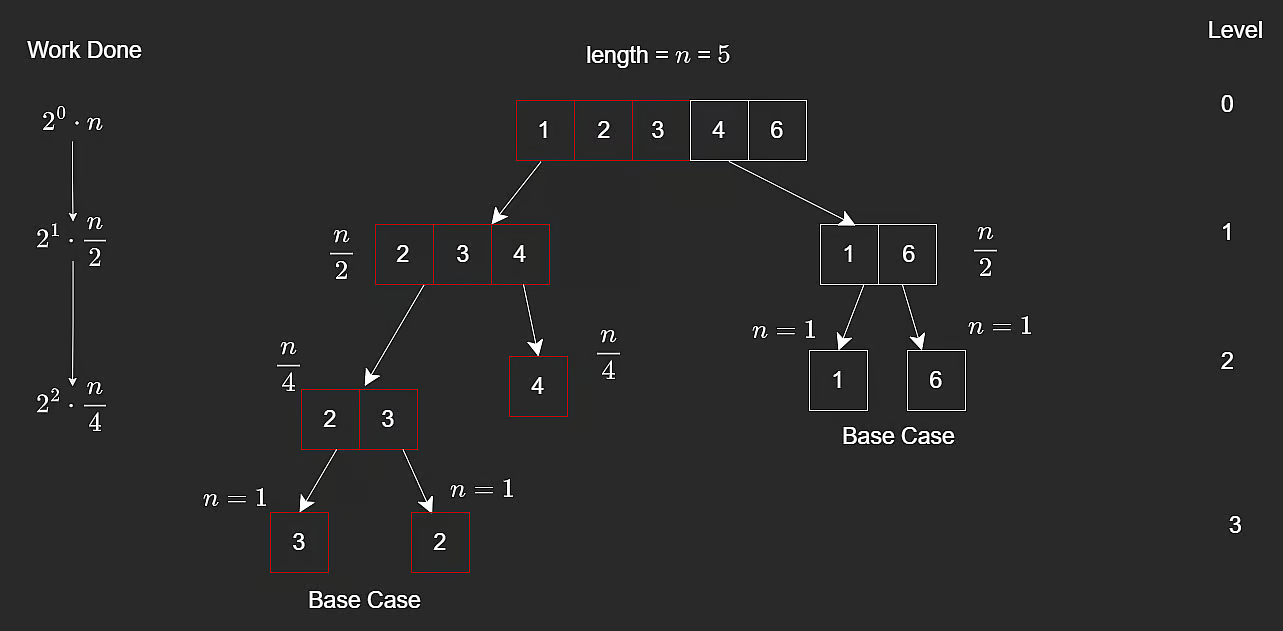

if $n$ is the length of our array at any given level, then the subarrays in the next level is $n/2$. We are interested in how many levels it takes to go from our initial big array to subarrays of all length 1. This is the same as how many times we can divide by $2$ until we hit the base case. This is $n/{2*2..}=n/{2^x}$=1 where x is the number of times we need to divide by 2. If

$$
n/2^x=1
$$

Then

$$
x=\log_2(n)
$$

We also note that each level takes approximately $n$ calls (recall that merging 2 sorted lists of $g$ and $h$ is $O(g+h)$ ) as the total 'length' of this level is $n$.

Then, the total cost of `mergeSort` is $O(n) * O(log(n))$ which is $O(nlogn)$.

### Space

The height of the tree is $logn$ at any given level,  we have $n$ elems to sort which we will allocate temporary arrays for. The total space complexity is $O(n+log(n))$ which is $O(n)$. We sum rather than multiply because not all the arrays/memory are used at the same time

---

## Stability

MergeSort is stable. If we have duplicates `7`, one in the left array and one in the right, then when we merge, we always pick the one in the left subarray first. Hence preserving relative order.

```python
#equality case
if leftSubarray[i] <= rightSubarray[j]:
    arr[k] = leftSubarray[i]
    i += 1
```


## Comparisons

Insertionsort runs in worst case of $O(n^2)$, while MergeSort is $O(nlogn)$ in **all** of average/best/worst scenarios so MergeSort is superior.

The only time where we might use InsertionSort is when the array has few elems, or is almost nearly sorted, and then InsertionSort skips alot of the swapping.